<a href="https://colab.research.google.com/github/TheJoys2019/DS-Unit-2-Sprint-3-Classification-Validation/blob/master/Artin%20Sinani%20-%20DS_Unit_2_Sprint_Challenge_3_Classification_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 _Lambda School Data Science Unit 2_
 
 # Classification & Validation Sprint Challenge

Follow the instructions for each numbered part to earn a score of 2. See the bottom of the notebook for a list of ways you can earn a score of 3.

#### For this Sprint Challenge, you'll predict whether a person's income exceeds $50k/yr, based on census data.

You can read more about the Adult Census Income dataset at the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/adult

#### Run this cell to load the data:

In [21]:
import pandas as pd

columns = ['age', 
           'workclass', 
           'fnlwgt', 
           'education', 
           'education-num', 
           'marital-status', 
           'occupation', 
           'relationship', 
           'race', 
           'sex', 
           'capital-gain', 
           'capital-loss', 
           'hours-per-week', 
           'native-country', 
           'income']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                 header=None, names=columns)

df['income'] = df['income'].str.strip()
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Part 1 — Begin with baselines

Split the data into an **X matrix** (all the features) and **y vector** (the target).

(You _don't_ need to split the data into train and test sets here. You'll be asked to do that at the _end_ of Part 1.)

In [75]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [0]:
from sklearn.metrics import accuracy_score

X = df.drop(columns='income')
y = df['income'] == '>50K'

What **accuracy score** would you get here with a **"majority class baseline"?** 
 
(You can answer this question either with a scikit-learn function or with a pandas function.)

In [29]:
df['income'].value_counts(normalize=True)

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

In [31]:
#Majority Class
majority_class = y.mode()[0]

y_pred = [majority_class]*len(y)

accuracy_score(y,y_pred)

0.7591904425539756

What **ROC AUC score** would you get here with a **majority class baseline?**

(You can answer this question either with a scikit-learn function or with no code, just your understanding of ROC AUC.)

In [32]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, y_pred)

0.5

In [0]:
"""
ROC/AUC score of 0.5 is no better than flipping a coin theoretically or 50/50 chance.
"""

In this Sprint Challenge, you will use **"Cross-Validation with Independent Test Set"** for your model validaton method.

First, **split the data into `X_train, X_test, y_train, y_test`**. You can include 80% of the data in the train set, and hold out 20% for the test set.

In [0]:
from sklearn.model_selection import train_test_split
# Split Train, Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26048, 14), (6513, 14), (26048,), (6513,))

## Part 2 — Modeling with Logistic Regression!

- You may do exploratory data analysis and visualization, but it is not required.
- You may **use all the features, or select any features** of your choice, as long as you select at least one numeric feature and one categorical feature.
- **Scale your numeric features**, using any scikit-learn [Scaler](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) of your choice.
- **Encode your categorical features**. You may use any encoding (One-Hot, Ordinal, etc) and any library (category_encoders, scikit-learn, pandas, etc) of your choice.
- You may choose to use a pipeline, but it is not required.
- Use a **Logistic Regression** model.
- Use scikit-learn's [**cross_val_score**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) function. For [scoring](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules), use **accuracy**.
- **Print your model's cross-validation accuracy score.**

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce

df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


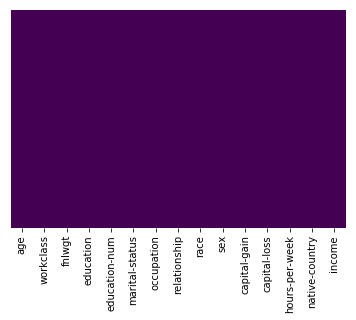

In [51]:
# Checking to see if there are any null values visually in the entire dataset
# if any nulls were present you'd see a yellow horizontal line
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False, cbar=False,cmap='viridis');

In [52]:
!pip install category_encoders

In [53]:
X_train.select_dtypes(exclude='number').nunique().sort_values()

sex                2
race               5
relationship       6
marital-status     7
workclass          9
occupation        15
education         16
native-country    42
dtype: int64

In [0]:
# Make pipeline and get score/mean

In [0]:
pipeline_0 = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    StandardScaler(),
    LogisticRegression(solver='lbfgs', max_iter=1000))

In [63]:
score_0 = cross_val_score(pipeline_0, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1, verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   11.0s finished


In [64]:
mean_score = score.mean()

mean_score

0.8507752447956076

## Part 3 — Modeling with Tree Ensembles!

Part 3 is the same as Part 2, except this time, use a **Random Forest** or **Gradient Boosting** classifier. You may use scikit-learn, xgboost, or any other library. Then, print your model's cross-validation accuracy score.

In [62]:
pipeline_1 = make_pipeline(
    ce.OrdinalEncoder(),
    MinMaxScaler(),
    RandomForestClassifier(max_depth=3, n_estimators=100, n_jobs=-1, random_state=42))


score_1 = cross_val_score(pipeline_1, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1, verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.4s finished


In [67]:
# Calculate score mean

mean_score_1 = score_1.mean()

mean_score_1

0.8364171469430387

## Part 4 — Calculate classification metrics from a confusion matrix

Suppose this is the confusion matrix for your binary classification model:

<table>
  <tr>
    <td colspan="2" rowspan="2"></td>
    <td colspan="2">Predicted</td>
  </tr>
  <tr>
    <td>Negative</td>
    <td>Positive</td>
  </tr>
  <tr>
    <td rowspan="2">Actual</td>
    <td>Negative</td>
    <td style="border: solid">85</td>
    <td style="border: solid">58</td>
  </tr>
  <tr>
    <td>Positive</td>
    <td style="border: solid">8</td>
    <td style="border: solid"> 36</td>
  </tr>
</table>

In [0]:
# Figures to calculate
tp = 36
fp = 58
fn = 8
tn = 85

actual_negative = tn + fp
actual_positive = fn + tp

predicted_negative = tn + fn
predicted_positive = fp + tp

Calculate accuracy

In [72]:
# Accuracy = The proportion of predictions a model got correct
# Accuracy = (True Positives + True Negatives) / Total # of Predictions

accuracy = (tp+tn)/(predicted_negative+predicted_positive)

print('Accuracy: ', accuracy)

Accuracy:  0.6470588235294118


Calculate precision

In [73]:
# Precision - the proportion of positive identifications that were actually correct. 
# "How useful the results are"
# Precision = True Positives / (TP + FP)

precision = tp/predicted_positive

print('Precision: ', precision)


Precision:  0.3829787234042553


Calculate recall

In [74]:
# Recall - the proportion of actual positives

recall = tp/actual_positive

print('Recall: ', recall)

Recall:  0.8181818181818182


## BONUS — How you can earn a score of 3

### Part 1
Do feature engineering, to try improving your cross-validation score.

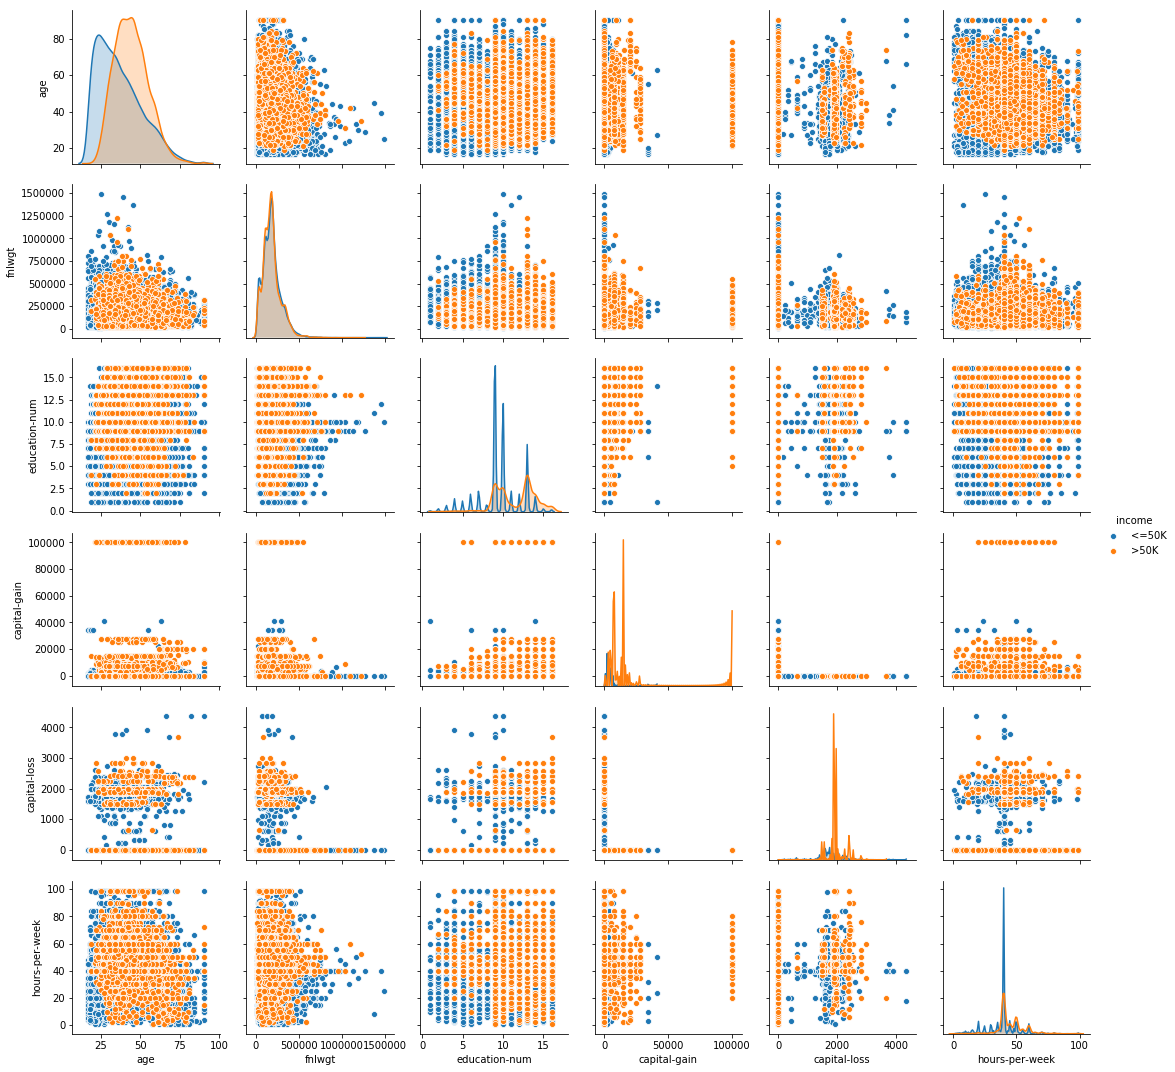

In [83]:
# Get a visual feel for which features have a relationship prior to engineering
sns.pairplot(df, hue='income')

In [0]:
X = df.drop('income', axis=1)
y = df['income']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=101)

In [87]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

ValueError: ignored

### Part 2
Experiment with feature selection, preprocessing, categorical encoding, and hyperparameter optimization, to try improving your cross-validation score.





### Part 3
Which model had the best cross-validation score? Refit this model on the train set and do a final evaluation on the held out test set — what is the test score? 



### Part 4
Calculate F1 score and False Positive Rate. 

In [82]:
"""
F1 Score - The harmonic average of the precision and recall; 
            an F1 score reaches its best value at 1 (perfect precision and recall) 
            and worst at 0.
            
            F1 = (2)[(Precision*Recall)/(Precision+Recall)]
"""

f1_score = 2*[(precision*recall)/(precision+recall)]


# from sklearn.metrics import classification_report

# print(classification_report())

print('F1 Score: ', f1_score)

F1 Score:  [0.2608695652173913, 0.2608695652173913]


In [81]:
# False Positive Rate = FP / (FP + TN)

fpr = fp / (fp+tn)

print('False Positive Rate: ' , fpr)

False Positive Rate:  0.40559440559440557
